Binary Classifier (T-shirt/top vs Not) on Fashion-MNIST
--------------------------------------------------------
Accuracy:  0.9588
Precision: 0.8163
Recall:    0.7586
F1-score:  0.7864
ROC-AUC:   0.9783

Confusion Matrix:
[[12361   239]
 [  338  1062]]


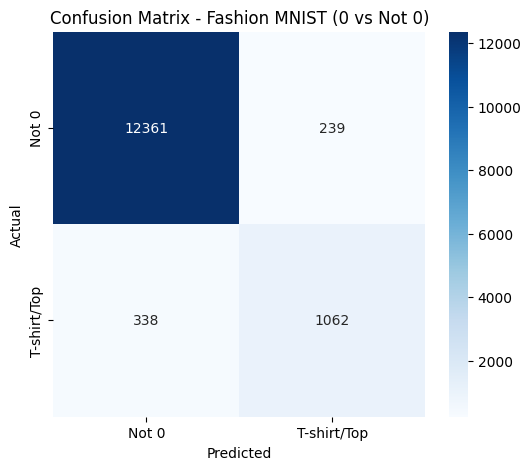

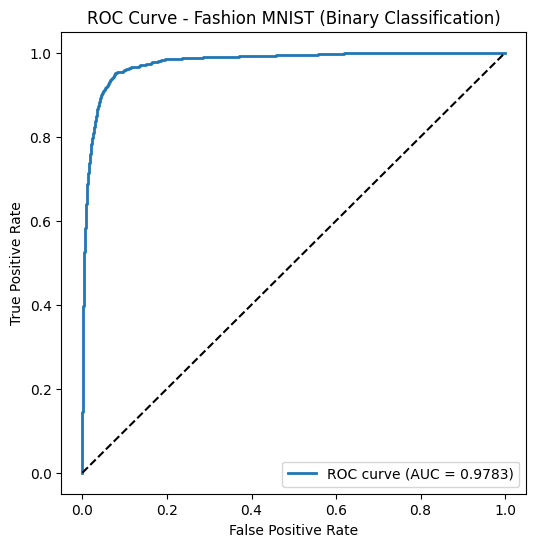

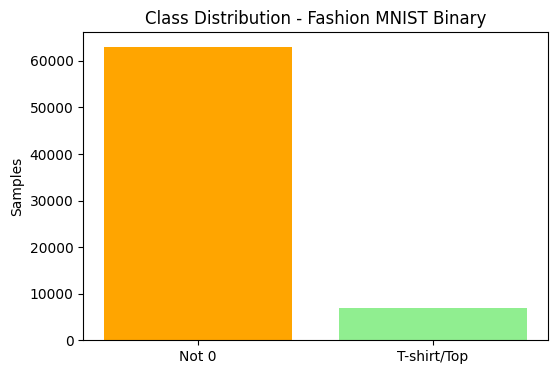

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)

fashion = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X, y = fashion['data'], fashion['target'].astype(int)
y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train); X_test = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("Binary Classifier (T-shirt/top vs Not) on Fashion-MNIST")
print("--------------------------------------------------------")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not 0","T-shirt/Top"], yticklabels=["Not 0","T-shirt/Top"])
plt.title("Confusion Matrix - Fashion MNIST (0 vs Not 0)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Fashion MNIST (Binary Classification)')
plt.legend(loc='lower right'); plt.show()

unique, counts = np.unique(y_binary, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(["Not 0","T-shirt/Top"],counts,color=["orange","lightgreen"])
plt.title("Class Distribution - Fashion MNIST Binary"); plt.ylabel("Samples"); plt.show()
